In [43]:
import numpy as np
import pandas as pd

data import


In [44]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head(5)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [45]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

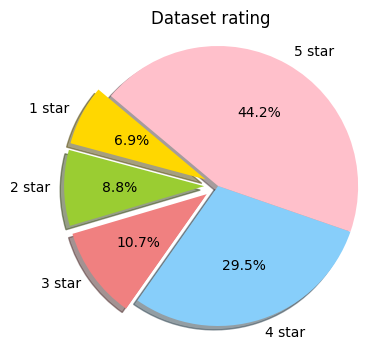

In [46]:
import matplotlib.pyplot as plt
labels = ['1 star', '2 star', '3 star', '4 star' ,'5 star']
sizes = [1421,1793,2184,6039,9054]  
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue' , 'pink']
explode = (0.1, 0.1, 0.1, 0,0) 
plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Dataset rating')
plt.show()

In [47]:
df_neg = df.loc[ df['Rating'] < 3 ] 
df_neg = df_neg.reset_index(drop = True)

In [48]:
df_five = df.loc[df['Rating']==5]
df_five = df_five.reset_index(drop = True)

In [49]:
df_pos = df_five.loc[:len(df_neg)]

In [50]:
df_all = pd.concat([df_neg,df_pos],axis=0)
df_all = df_all.reset_index(drop = True)

In [51]:
len(df_all)

6429

In [52]:
df_all["Sentiment"] = np.where(df_all["Rating"]== 5 , "Positive" , "Negative")

In [53]:
df_all = df_all.sample(frac = 1)
df_all = df_all.reset_index(drop = True)
df_all.head(20)

,Review,Rating,Sentiment
0,punta cuna grand palladium resort mistake sure...,1,Negative
1,"place minimalism delivers not, feel living par...",5,Positive
2,hotel experience just returned italy stayed mu...,1,Negative
3,fantastic hotel trip san francisco delighted h...,5,Positive
4,"great place luxurious night afford great, got ...",5,Positive
5,rude staff airport shuttle handy thing arrivin...,2,Negative
6,good experience having booked minute escape un...,5,Positive
7,disappointed honeymooners course estatic 1st t...,2,Negative
8,not speak english just like share interested v...,2,Negative
9,just ok price family stayed mediterranean suit...,2,Negative


In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df_all.Review , df_all.Sentiment)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

In [56]:
from sklearn import svm 
clf_svm = svm.SVC(kernel="linear")
clf_svm.fit(x_train_vec,y_train)

SVC(kernel='linear')

In [57]:
clf_svm.score(x_test_vec,y_test)

0.9527363184079602

In [58]:
from sklearn.metrics import f1_score
f1_score(y_test,clf_svm.predict(x_test_vec) , average = None)

array([0.95279503, 0.95267746])

In [59]:
rev = ["lovely hotel great location beautiful stylish hotel, staff efficient friendly, rooftop bar pool area lovely unfortunately weather fairly overcast stay did n't sample pool cocktails civilised way start end evening, disappointment room overlooked central courtyard natural light room limited,  "]
rev_vec = v.transform(rev) 
clf_svm.predict(rev_vec)

array(['Positive'], dtype=object)

In [60]:
rev = ["absolutely hated this place. horrible place"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

In [61]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

predictions = clf_svm.predict(x_test_vec)


precision = precision_score(y_test, predictions, pos_label='Positive')


recall = recall_score(y_test, predictions, pos_label='Positive')

accuracy = accuracy_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.9634760705289672
Recall: 0.9421182266009852
Accuracy: 0.9527363184079602
